In [3]:
import os
import random
import shutil
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

## Understanding MRI Sequences

### SWI (Susceptibility Weighted Imaging)
- **Notes**: Type avancé de T2 : Augmente la visibilité des structures veinseuses et des micro-lésions
- **Description**: SWI is sensitive to blood products and can be useful for detecting microbleeds or small vessels. It can highlight areas of hemorrhage or small vessel occlusions.
- **Slices to Focus On**: Look for slices that show contrasts in areas where strokes are common, such as the basal ganglia or the periventricular region.

### TOF (Time of Flight) MRI
- **Notes**: Visualise les vaisseaux sanguins sans produits de contrastes. Repose sur la différences de flux : le sang frais est lumineux, le sang stagnant apparaît sombre.
- **Description**: TOF is an angiography technique used to visualize blood flow. It can help identify large vessel occlusions, which are often the cause of ischemic strokes.
- **Slices to Focus On**: Focus on slices showing major cerebral arteries like the middle cerebral artery (MCA) or internal carotid artery.


In [33]:
def convert_nifti_to_png(nifti_file_path, output_folder, slice_index):
    img = nib.load(nifti_file_path)
    data = img.get_fdata()

    # Extract a slice (modify the slice_index as needed)
    slice_data = data[:, :, slice_index]

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    plt.imsave(os.path.join(output_folder, f'slice_{slice_index}.png'), slice_data, cmap='gray')

# Example usage
nifti_file_path = r'C:/Users/benysar/Desktop/Github/stroke-occlusion/data/envoi-20231207/2018-104_01-10087-D0MR/SEG_THROMBMICS/2018-104_01-10087-D0MR_S12_202312051300_Tours-THROMBMICS-Clot-Segmentation.nii.gz' 
output_folder = r'C:/Users/benysar/Desktop/Github/stroke-occlusion/data/envoi-20231207/2018-104_01-10087-D0MR/SEG_THROMBMICS'
slice_index = -40  

convert_nifti_to_png(nifti_file_path, output_folder, slice_index)


In [34]:
def convert_nifti_to_png(nifti_file_path, output_folder, slice_index=-40, name_file="slice.png"):
    img = nib.load(nifti_file_path)
    data = img.get_fdata()

    slice_data = data[:, :, slice_index]

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save the slice as a PNG file
    plt.imsave(os.path.join(output_folder, name_file), slice_data)

# Example usage
nifti_file_path = r'C:/Users/benysar/Desktop/Github/stroke-occlusion/data/envoi-20231207/2018-104_01-10087-D0MR/TOF3D/2018-104_01-10087-D0MR_8_TOF_3D_NEW_wo_ARTEFACTS_fl3d1r_t50.nii.gz'  # Update this path
output_folder = r'./testing_viz'  
convert_nifti_to_png(nifti_file_path, output_folder)

## Understanding MRI Slices and Planes

MRI slices are 2D images from a 3D volume, providing cross-sectional views of the scanned body part. Key planes for these slices include:

### Axial (Transverse) Plane
- **Orientation**: Parallel to the ground, dividing the body into top and bottom halves.
- **Brain Imaging Use**: Views from the top, showing structures like cerebral hemispheres, ventricles, cerebellum.

### Coronal Plane
- **Orientation**: Vertical, dividing the body into front (anterior) and back (posterior) halves.
- **Brain Imaging Use**: Frontal view, assessing areas like the frontal and temporal lobes, and the separation between hemispheres.

### Sagittal Plane
- **Orientation**: Vertical, dividing the body into left and right halves.
- **Brain Imaging Use**: Side view, ideal for examining midline structures like the corpus callosum, brainstem, cerebellum.

**Purpose**: The choice of plane and slice depends on the targeted anatomy and diagnostic needs. In stroke detection, axial slices are commonly used for a comprehensive brain view, while coronal and sagittal slices provide additional diagnostic information.


In [28]:
def find_max_segmentation_slice(mask):
    """
    Find the slice index with the maximum segmentation area in a 3D mask.

    This function calculates the sum of segmented pixels in each slice of the
    3D mask and returns the index of the slice with the highest sum. It assumes
    that the mask is a 3D NumPy array where the last dimension represents the slice index.

    Parameters:
    mask (numpy.ndarray): A 3D array representing the segmentation mask.

    Returns:
    int: Index of the slice with the maximum segmentation area.
    """
    sum_over_slices = np.sum(np.sum(mask, axis=0), axis=0)
    return np.argmax(sum_over_slices)

def overlay_mask(image, mask, slice_index):
    """
    Overlay a segmentation mask onto a specific slice of an image and display it.

    This function displays the specified slice of the image and overlays the corresponding
    segmentation mask. The mask is applied with full opacity for better visibility.

    Parameters:
    image (numpy.ndarray): The 3D array representing the MRI image.
    mask (numpy.ndarray): The 3D array representing the segmentation mask.
    slice_index (int): The index of the slice to be displayed and overlaid with the mask.

    Returns:
    None: This function only displays the image and does not return any value.
    """
    plt.imshow(image[:, :, slice_index], cmap='bone')
    plt.imshow(np.ma.masked_where(mask[:, :, slice_index] == 0, mask[:, :, slice_index]), cmap='binary', alpha=1)
    plt.show()

def plot_mri_with_heatmap(mri_file_path, segmentation_file_path):
    """
    Load an MRI image and its segmentation mask from file paths, find the most
    significant slice, and display it with the segmentation overlay.

    This function reads MRI and segmentation mask data from NIfTI files, identifies
    the slice with the maximum segmented area using the mask, and then uses
    overlay_mask to display this slice with the segmentation overlay.

    Parameters:
    mri_file_path (str): File path to the MRI NIfTI file.
    segmentation_file_path (str): File path to the segmentation mask NIfTI file.

    Returns:
    None: This function only performs data loading and visualization.
    """
    image = nib.load(mri_file_path).get_fdata()
    mask = nib.load(segmentation_file_path).get_fdata()
    max_slice_index = find_max_segmentation_slice(mask)
    overlay_mask(image, mask, max_slice_index)


Visualizing slices for patient folder 2018-104_04-10243-D0MR


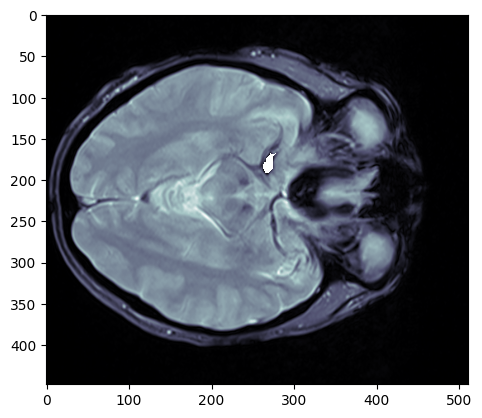

Visualizing slices for patient folder 2018-104_01-10173-D0MR


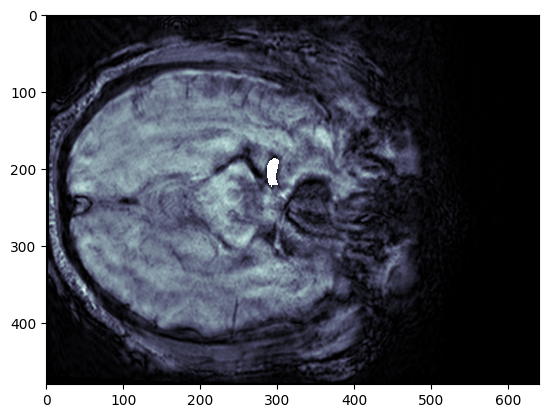

Visualizing slices for patient folder 2018-104_01-10113-D0MR


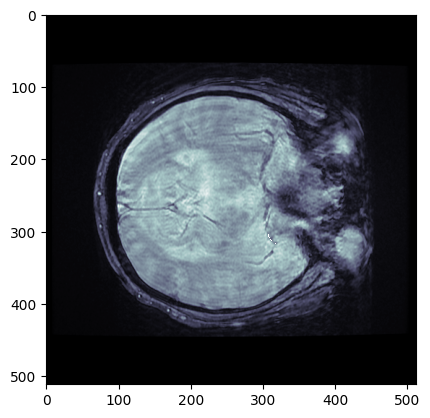

Visualizing slices for patient folder 2018-104_01-10126-D0MR


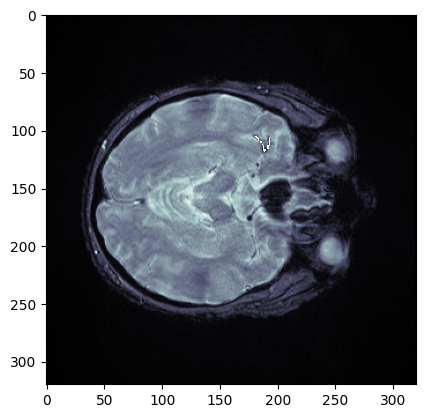

Visualizing slices for patient folder 2018-104_01-10218-D0MR


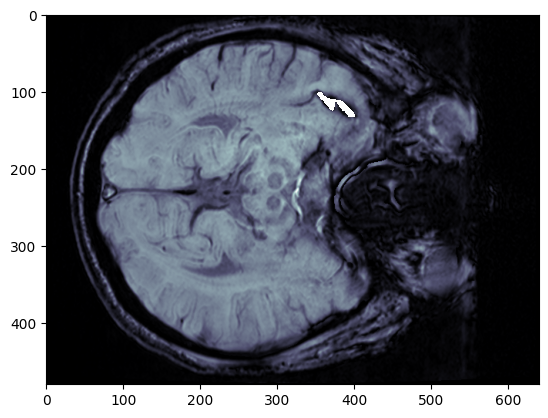

Visualizing slices for patient folder 2018-104_01-10317-D0MR


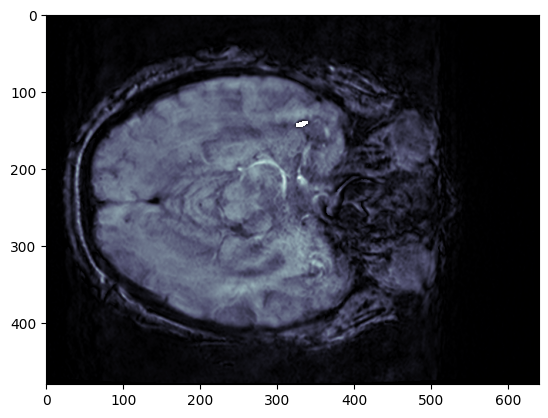

Visualizing slices for patient folder 2018-104_05-10331-D0MR


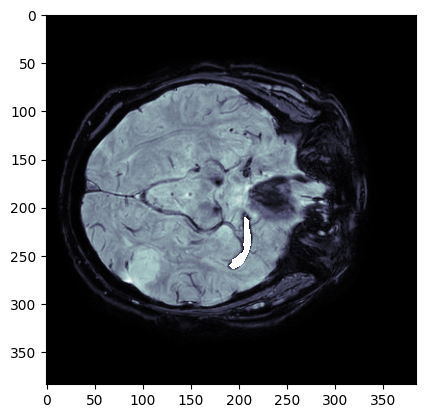

Visualizing slices for patient folder 2018-104_06-10263-D0MR


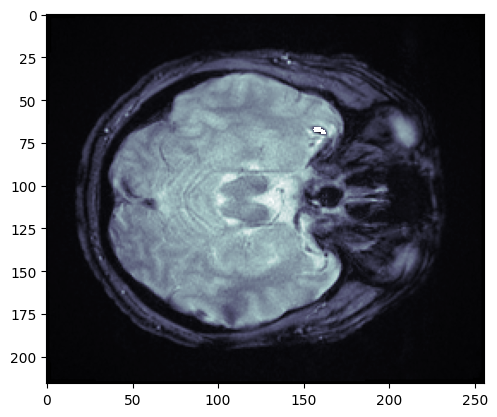

In [37]:
# Base directory containing patient folders
base_directory = 'C://Users//benysar//Desktop//Github//stroke-occlusion//data//envoi-20231207'

# List all patient folders
all_folders = [os.path.join(base_directory, d) for d in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, d))]

# Randomly select 7/8 patient folders
selected_folders = random.sample(all_folders, k=random.choice([7, 8]))

# Process each selected folder
for folder in selected_folders:
    modality_path = os.path.join(folder, 'SWI')
    segmentation_path = os.path.join(folder, 'SEG_THROMBMICS')

    if os.path.exists(modality_path) and os.path.exists(segmentation_path):
        mri_files = [f for f in os.listdir(modality_path) if f.endswith('.nii.gz')]
        segmentation_files = [f for f in os.listdir(segmentation_path) if f.endswith('.nii.gz')]

        if mri_files and segmentation_files:
            mri_file_path = os.path.join(modality_path, mri_files[0])
            segmentation_file_path = os.path.join(segmentation_path, segmentation_files[0])

            print(f"Visualizing slices for patient folder {os.path.basename(folder)}")
            plot_mri_with_heatmap(mri_file_path, segmentation_file_path)
        else:
            print(f"No NIfTI files found in {modality_path} or {segmentation_path}")
    else:
        print(f"Modality SWI or segmentation not found in folder {folder}")

Personal notes : 

Variations in image quality and contrast in MRI scans can arise from several factors, including patient movement during the scan. It's important to account for these variations in the development of image processing algorithms. Key strategies should focus on normalization to standardize image quality across different scans, as well as enhancing contrast and employing image smoothing techniques to mitigate the effects of movement and other artifacts.

## NIFTI into array


In [15]:
nifti_file1 = nib.load('C:/Users/benysar/Desktop/Github/stroke-occlusion/data/envoi-20231207/2018-104_01-10087-D0MR/TOF3D/2018-104_01-10087-D0MR_8_TOF_3D_NEW_wo_ARTEFACTS_fl3d1r_t50.nii.gz')
nifti_file2 = nib.load('C:/Users/benysar/Desktop/Github/stroke-occlusion/data/envoi-20231207/2018-104_01-10113-D0MR/TOF3D/2018-104_01-10113-D0MR_6_3D_TOF_LARGE_.nii.gz')

print(nifti_file1.get_fdata().shape)
print(nifti_file2.get_fdata().shape)

(656, 768, 127)
(512, 512, 136)


=> Different shapes in data. Expected

In [38]:
# is_nonzero_present = np.any(numpy_array2 != 0)

# print(is_nonzero_present)

#### Copying every TOF3D and mask into one folder

In [7]:
import os
import shutil

# Set the base directory and target directory
base_dir = 'data/envoi-20231207'
target_dir = 'E:/TOF3D'

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Traverse the directory structure
for patient_folder in os.listdir(base_dir):
    patient_path = os.path.join(base_dir, patient_folder, 'TOF3D')
    if os.path.isdir(patient_path):
        nii_files = [f for f in os.listdir(patient_path) if f.endswith('.nii.gz')]
        if nii_files:
            nii_files.sort()  # Sort the files alphabetically
            file_to_copy = nii_files[0]  # Select the first file =>> Some files have two nii.gz that seems to be the same in folder TOF3D. 
                                         # I do this because i need the same number of X and Y for my train/test split
            file_path = os.path.join(patient_path, file_to_copy)
            shutil.copy(file_path, target_dir)
            print(f"Copied {file_path} to {target_dir}")

print("Copying complete.")


Copied data/envoi-20231207\2018-104_01-10087-D0MR\TOF3D\2018-104_01-10087-D0MR_8_TOF_3D_NEW_wo_ARTEFACTS_fl3d1r_t50.nii.gz to E:/TOF3D
Copied data/envoi-20231207\2018-104_01-10113-D0MR\TOF3D\2018-104_01-10113-D0MR_6_3D_TOF_LARGE_.nii.gz to E:/TOF3D
Copied data/envoi-20231207\2018-104_01-10114-D0MR\TOF3D\2018-104_01-10114-D0MR_6_3D_TOF_LARGE_.nii.gz to E:/TOF3D
Copied data/envoi-20231207\2018-104_01-10116-D0MR\TOF3D\2018-104_01-10116-D0MR_8_TOF_3D_WILLIS_FIN_fl3d1r_t70.nii.gz to E:/TOF3D
Copied data/envoi-20231207\2018-104_01-10117-D0MR\TOF3D\2018-104_01-10117-D0MR_6_3D_TOF_LARGE_.nii.gz to E:/TOF3D
Copied data/envoi-20231207\2018-104_01-10118-D0MR\TOF3D\2018-104_01-10118-D0MR_8_TOF_3D_RAPIDE_fl3d1r_t40.nii.gz to E:/TOF3D
Copied data/envoi-20231207\2018-104_01-10120-D0MR\TOF3D\2018-104_01-10120-D0MR_501_3D_TOF_HS_.nii.gz to E:/TOF3D
Copied data/envoi-20231207\2018-104_01-10124-D0MR\TOF3D\2018-104_01-10124-D0MR_5_3D_TOF_HS_.nii.gz to E:/TOF3D
Copied data/envoi-20231207\2018-104_01-10126-

In [4]:
# Set the base directory and target directory
base_dir = 'data/envoi-20231207'
target_dir = 'E:/MASK'

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Traverse the directory structure
for patient_folder in os.listdir(base_dir):
    patient_path = os.path.join(base_dir, patient_folder, 'SEG_THROMBMICS')
    if os.path.isdir(patient_path):
        for filename in os.listdir(patient_path):
            if filename.endswith('.nii.gz'):
                file_path = os.path.join(patient_path, filename)
                shutil.copy(file_path, target_dir)
                print(f"Copied {file_path} to {target_dir}")

print("Copying complete.")

Copied data/envoi-20231207\2018-104_01-10087-D0MR\SEG_THROMBMICS\2018-104_01-10087-D0MR_S12_202312051300_Tours-THROMBMICS-Clot-Segmentation.nii.gz to E:/MASK
Copied data/envoi-20231207\2018-104_01-10113-D0MR\SEG_THROMBMICS\2018-104_01-10113-D0MR_S9_202312051300_Tours-THROMBMICS-Clot-Segmentation.nii.gz to E:/MASK
Copied data/envoi-20231207\2018-104_01-10114-D0MR\SEG_THROMBMICS\2018-104_01-10114-D0MR_S7_202312051300_Tours-THROMBMICS-Clot-Segmentation.nii.gz to E:/MASK
Copied data/envoi-20231207\2018-104_01-10116-D0MR\SEG_THROMBMICS\2018-104_01-10116-D0MR_S7_202312051300_Tours-THROMBMICS-Clot-Segmentation.nii.gz to E:/MASK
Copied data/envoi-20231207\2018-104_01-10117-D0MR\SEG_THROMBMICS\2018-104_01-10117-D0MR_S7_202312051300_Tours-THROMBMICS-Clot-Segmentation.nii.gz to E:/MASK
Copied data/envoi-20231207\2018-104_01-10118-D0MR\SEG_THROMBMICS\2018-104_01-10118-D0MR_S12_202312051300_Tours-THROMBMICS-Clot-Segmentation.nii.gz to E:/MASK
Copied data/envoi-20231207\2018-104_01-10120-D0MR\SEG_TH

### Saving npy files for arrays

Notes : First step of pre-processing for futur algorithm. For now we will try using the arrays instead of images themselves (data uniformity and manipulation, efficiency in processing, compatibility with ML algorithms and better control over image features)

In [8]:
# Set the directory containing the .nii.gz files
directory = 'E:/data/TOF3D'

# Iterate over files in the directory

for filename in os.listdir(directory):
    if filename.endswith('.nii.gz'):
        filepath = os.path.join(directory, filename)

        # Load the image
        img = nib.load(filepath)
        data = img.get_fdata()

        # Save the 3D array to a .npy file
        output_filename = os.path.join(directory, os.path.splitext(filename)[0] + '.npy')
        np.save(output_filename, data)

        print(f"Saved data from {filename} to {output_filename}")

Saved data from 2018-104_01-10087-D0MR_8_TOF_3D_NEW_wo_ARTEFACTS_fl3d1r_t50.nii.gz to E:/data/TOF3D\2018-104_01-10087-D0MR_8_TOF_3D_NEW_wo_ARTEFACTS_fl3d1r_t50.nii.npy
Saved data from 2018-104_01-10113-D0MR_6_3D_TOF_LARGE_.nii.gz to E:/data/TOF3D\2018-104_01-10113-D0MR_6_3D_TOF_LARGE_.nii.npy
Saved data from 2018-104_01-10114-D0MR_6_3D_TOF_LARGE_.nii.gz to E:/data/TOF3D\2018-104_01-10114-D0MR_6_3D_TOF_LARGE_.nii.npy
Saved data from 2018-104_01-10116-D0MR_8_TOF_3D_WILLIS_FIN_fl3d1r_t70.nii.gz to E:/data/TOF3D\2018-104_01-10116-D0MR_8_TOF_3D_WILLIS_FIN_fl3d1r_t70.nii.npy
Saved data from 2018-104_01-10117-D0MR_6_3D_TOF_LARGE_.nii.gz to E:/data/TOF3D\2018-104_01-10117-D0MR_6_3D_TOF_LARGE_.nii.npy
Saved data from 2018-104_01-10118-D0MR_8_TOF_3D_RAPIDE_fl3d1r_t40.nii.gz to E:/data/TOF3D\2018-104_01-10118-D0MR_8_TOF_3D_RAPIDE_fl3d1r_t40.nii.npy
Saved data from 2018-104_01-10120-D0MR_501_3D_TOF_HS_.nii.gz to E:/data/TOF3D\2018-104_01-10120-D0MR_501_3D_TOF_HS_.nii.npy
Saved data from 2018-104_0